# Intelligent World Informatics LectureV: Assignment Week 12
- Author: Paul Lödige (ploedige@g.ecc.u-tokyo.ac.jp)
- Student ID: 37-229753

## Assignment
- Define your own project
  - Describe the task and the goal you would like to achieve
  - Experiment on any public dataset provided by Tensorflow:
    - Full list: https://www.tensorflow.org/datasets/catalog/overview
    - Simple datasets: https://www.tensorflow.org/api_docs/python/tf/keras/datasets
  - Do one of the followings:
    1. Apply two different deep learning techniques you learned from this class
       - e.g.: Comparing Dense DNN vs RNN method on the same dataset (what pros and cons?)
       - e.g.: Combining CNN and RNN on a dataset (why the combination is preferable?)
    2. Apply transfer learning with two different base models
       - Explain the reasons why the base models are reasonable choices.
       - Survey on the internet with keywords such as “best model for imagenet/cifar10/mnist”, “tensorflow pre-trained models”, etc, to find the name of the model
       - Download the base model through tensorflow
         - Just like in the code, simply change the name of the base model. List of available base models in Tensorflow:
           - https://www.tensorflow.org/api_docs/python/tf/keras/applications
         - Add layers, dropouts, use different learning rate, epoch, batch_size, etc.

### Additional Details
- Write 1 ~ 2 page(s) (excluding the code) describing your project:
  - Imagine the project as a kind of “mini research paper”
  - What is the problem? What is your motivation?
  - How are you solving them? What deep learning algorithms?
  - Outline the experiment and test on the dataset.
  - What are the results?
    - Add at least 1 figure and insert your analysis
  - Attach the code at the end.
  - Include your name, affiliation, student number, as well as your university e-mail address in case if we need to contact you for clarification
  - Put all the above in a single PDF and upload to ITC-LMS

### How the project is graded
- The purpose of the project is to make you familiar with machine learning experiments.
  - Not intended to be a stressful project.
    - So do not worry too much on achieving high accuracy, good parameter settings, etc
    - Make sure to keep it simple
- What we would like to see:
  - Clarity of the project description
  - Relevance between the problem and the chosen approaches
  - Appropriate input/output design and execution of the experiments
  - Proper evaluation methods, figures and tables
  - Easy to understand writings, informative comments on the code
- Overall grade for this course : 70% homeworks, 30% final project
  - Bonus points for helping each other on slack
    - Feel free to discuss your final project on slack if you have troubles

## Code
### Import libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, applications, optimizers
import tensorflow_datasets as tfds
import tkinter.messagebox # for notifications

2023-02-03 13:55:00.456857: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-03 13:55:00.602905: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-03 13:55:00.602949: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-03 13:55:01.295401: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

#### Load Dataset
https://www.tensorflow.org/datasets/keras_example

In [2]:
# split into training and test data
ds_train, ds_test = tfds.load(
    'svhn_cropped', 
    split=['train', 'test'],
    shuffle_files=True, 
    as_supervised=True
    )

2023-02-03 13:55:02.605437: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-03 13:55:02.605483: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-03 13:55:02.605508: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (paul-laptop): /proc/driver/nvidia/version does not exist
2023-02-03 13:55:02.605775: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Confirm Data

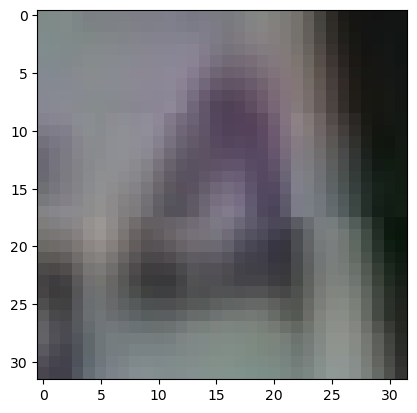

In [3]:
for image, label in ds_train.take(1):
    plt.imshow(image)
    plt.show()

#### Define normalization function

In [4]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

#### Build a training pipeline

In [5]:
ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

#### Build an evaluation pipeline

In [6]:
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.cache()
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

#### Configurations
The following is a list of the neural network configurations that will be compared:

In [7]:
configs = {}

In [12]:
configs['regular Neural Network (3 hidden layers)'] = {
        'model': models.Sequential([
            layers.Flatten(input_shape=(32, 32, 3)),
            layers.Dense(256, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ]),
        'optimizer': 'adam',
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 10,
        'batch_size': 64
    }

In [22]:
configs['regular Neural Network (5 hidden layers)'] = {
        'model': models.Sequential([
            layers.Flatten(input_shape=(32, 32, 3)),
            layers.Dense(1024, activation='relu'),
            layers.Dense(512, activation='relu'),
            layers.Dense(256, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ]),
        'optimizer': 'adam',
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 10,
        'batch_size': 64
    }

In [26]:
configs['regular Neural Network (10 hidden layers)'] = {
        'model': models.Sequential([
            layers.Flatten(input_shape=(32, 32, 3)),
            layers.Dense(1024, activation='relu'),
            layers.Dense(1024, activation='relu'),
            layers.Dense(512, activation='relu'),
            layers.Dense(512, activation='relu'),
            layers.Dense(256, activation='relu'),
            layers.Dense(256, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ]),
        'optimizer': 'adam',
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 30,
        'batch_size': 64
    }

In [27]:
configs['convolutional neural network (1 convolution)'] = {
        'model': models.Sequential([
            layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ]),
        'optimizer': 'adam',
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 10,
        'batch_size': 64
    }

In [28]:
configs['convolutional neural network (3 convolutions)'] = {
        'model': models.Sequential([
            layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64, (3,3), activation='relu'),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(128, (3,3), activation='relu'),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ]),
        'optimizer': 'adam',
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 10,
        'batch_size': 128
    }

In [29]:
vgg16_base_model = applications.VGG16(input_shape=(32,32,3), include_top= False)
# freeze the VGG16 model
vgg16_base_model.trainable = False

configs['frozen VGG16 base model'] = {
        'model': models.Sequential([
            vgg16_base_model,
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(10, activation='softmax'),
        ]),
        'optimizer': 'adam',
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 5,
        'batch_size': 64
    }

In [30]:
vgg16_base_model = applications.VGG16(input_shape=(32,32,3), include_top= False)

configs['fully trainable VGG16 base model'] = {
        'model': models.Sequential([
            vgg16_base_model,
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(10, activation='softmax'),
        ]),
        'optimizer': optimizers.Adam(learning_rate=0.001),
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 5,
        'batch_size': 64
    }

In [31]:
vgg16_base_model = applications.VGG16(input_shape=(32,32,3), include_top= False)
# freeze the VGG16 model
vgg16_base_model.trainable = False
for layer in vgg16_base_model.layers[-6:]:
    layer.trainable=True

configs['partly trainable VGG16 base model'] = {
        'model': models.Sequential([
            vgg16_base_model,
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(10, activation='softmax'),
        ]),
        'optimizer': optimizers.Adam(learning_rate=0.001),
        'loss': 'sparse_categorical_crossentropy',
        'metrics': ['accuracy'],
        'epochs': 5,
        'batch_size': 64
    }

#### Compile the Models

In [23]:
for config in configs.values():
    if 'history' not in config.keys():
        config['model'].compile(
            optimizer=config['optimizer'],
            loss=config['loss'],
            metrics=config['metrics']
        )

#### Train and Evaluate the Models

In [24]:
try:
    for config_name, config in configs.items():
        if 'history' in config.keys():
            print(f'Already trained model "{config_name}"')
        else:
            print(f'Now training model "{config_name}"')
            config['history'] = config['model'].fit(ds_train, epochs=config['epochs'], validation_data=ds_test, batch_size=config['batch_size'])#, verbose=0)
except Exception as e:
    print(e)
    tkinter.messagebox.showerror("ERROR", f"ERROR: {e}")

Already trained model "regular Neural Network (3 hidden layers)"
Now training model "regular Neural Network (5 hidden layers)"
Epoch 1/10
573/573 [==============================] - 36s 63ms/step - loss: 2.2150 - accuracy: 0.1990 - val_loss: 2.0656 - val_accuracy: 0.2634
Epoch 2/10
573/573 [==============================] - 32s 57ms/step - loss: 1.5889 - accuracy: 0.4455 - val_loss: 1.4111 - val_accuracy: 0.5452
Epoch 3/10
573/573 [==============================] - 30s 52ms/step - loss: 1.2176 - accuracy: 0.6022 - val_loss: 1.1933 - val_accuracy: 0.6230
Epoch 4/10
573/573 [==============================] - 31s 54ms/step - loss: 1.0577 - accuracy: 0.6612 - val_loss: 1.1168 - val_accuracy: 0.6521
Epoch 5/10
573/573 [==============================] - 29s 50ms/step - loss: 0.9675 - accuracy: 0.6911 - val_loss: 1.0188 - val_accuracy: 0.6824
Epoch 6/10
573/573 [==============================] - 32s 56ms/step - loss: 0.8902 - accuracy: 0.7175 - val_loss: 0.9739 - val_accuracy: 0.7005
Epoch 7/1

#### Plot the accuracy

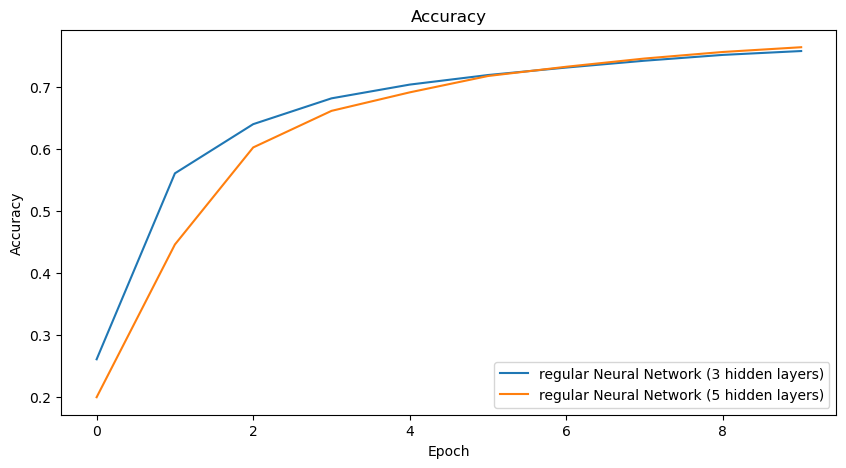

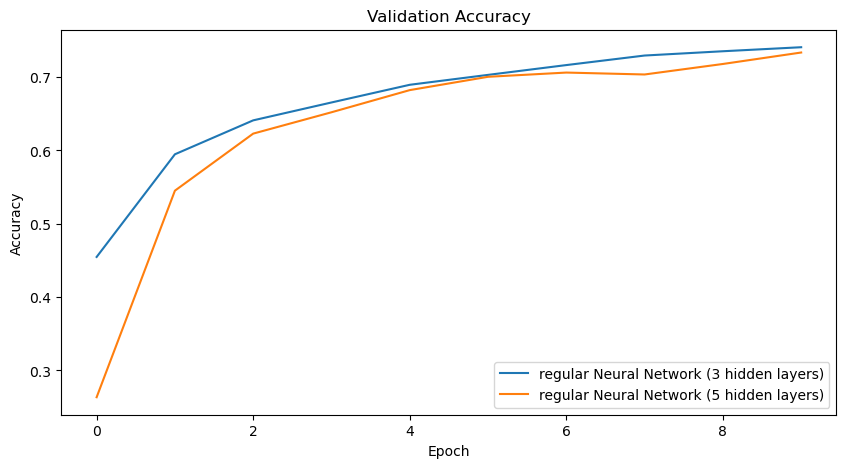

In [25]:
plt.figure(figsize=(10,5))
for config_name, config in configs.items():
    plt.plot(config['history'].history['accuracy'], label=config_name)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.75, 1])
plt.legend(loc='lower right')
plt.title("Accuracy")
plt.show()

plt.figure(figsize=(10,5))
for config_name, config in configs.items():
    plt.plot(config['history'].history['val_accuracy'], label=config_name)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.title("Validation Accuracy")
plt.show()

### Notify when done

In [26]:
tkinter.messagebox.showinfo("DONE", "DONE")

'ok'

### Save data for future use

In [27]:
# store histories with pickle
import pickle
histories = {}
for config_name, config in configs.items():
    histories[config_name] = config['history']
with open('savepoint.pkl', 'wb') as out:
    pickle.dump(histories, out)

# store models with tensorflow
for config_name, config in configs.items():
    config['model'].save(f'saved_models/{config_name}')

# store models in HDF5 format
for config_name, config in configs.items():
    config['model'].save(f'hdf5_models/{config_name}.h5')


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......flatten
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-03 15:40:22      9972096
config.json                                    2023-02-03 15:40:22         2425
metadata.json                                  2

INFO:tensorflow:Assets written to: saved_models/regular Neural Network (3 hidden layers)/assets


INFO:tensorflow:Assets written to: saved_models/regular Neural Network (3 hidden layers)/assets


INFO:tensorflow:Assets written to: saved_models/regular Neural Network (5 hidden layers)/assets


INFO:tensorflow:Assets written to: saved_models/regular Neural Network (5 hidden layers)/assets


#### Test Save File

In [28]:
new_model = tf.keras.models.load_model('hdf5_models/fully trainable VGG16 base model.h5')
print(new_model.summary())

# Evaluate the restored model
loss, acc = new_model.evaluate(ds_test)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_11 (Flatten)        (None, 512)               0         
                                                                 
 dense_47 (Dense)            (None, 64)                32832     
                                                                 
 dense_48 (Dense)            (None, 32)                2080      
                                                                 
 dense_49 (Dense)            (None, 10)                330       
                                                                 
Total params: 14,749,930
Trainable params: 14,749,930
Non-trainable params: 0
_________________________________________________________________
None
204/204 [===========================